<a href="https://colab.research.google.com/github/Jorbnc/MAIA-DL/blob/master/%E2%80%8EMini_Proyecto_1_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

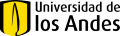

<span style="font-family:Cambria Math">
    
# Mini-proyecto 1, Técnica de *Deep Learning*: Clasificación de MRI con Redes Neuronales Convolucionales para Tipos de Cáncer

## Descripción del problema:

La resonancia magnética (MRI) desempeña un papel fundamental en la detección y
clasificación de los diferentes tipos de cáncer cerebral. La aplicación de redes
neuronales convolucionales (CNN) ha incrementado notablemente la precisión en la
interpretación de estos volúmenes, al ser entrenadas para reconocer patrones y
características distintivas asociadas a cada tipo de tumor. Las resonancias
magnéticas (MRI) generan volúmenes tridimensionales compuestos por múltiples
capas, donde cada una corresponde a una imagen bidimensional del tejido analizado.
Procesar un volumen completo implica manejar una gran cantidad de datos
simultáneamente, lo que puede ser computacionalmente costoso y requerir
considerable tiempo y recursos. Para este proyecto se trabajará exclusivamente con
imágenes individuales extraídas de las capas de los MRI, en lugar de procesar el
volumen completo. Esta estrategia simplifica la tarea al transformar el problema en
una clasificación de imágenes bidimensionales, reduciendo significativamente la
carga computacional.

## Objetivo:
*****
</span>

***

<div class="alert alert-block alert-info">
<bNotar:</b >

**Este proyecto es realizado por Andrés Felipe Ñungo y Jordan Bryan Núñez Campos para entrega el 2 de mayo.**
</div24></span>

<span style="font-family:Cambria Math">

***
    
# Índice
XXXXXX

1. [Instalación y carga de librerías](#instalacion-y-carga-de-librerias)
(#ejercicio-didactico-uso-de-la-cota-de-chernoff)
7. [Referencias](#referencias)
</span>

***

<span style="font-family:Cambria Math">

# 1. Instalación y cargue de librerías
</span>

***

<span style="font-family:Cambria Math">

En primer lugar se empieza por la descarga de las librerias usadas en este *notebook*. Adicionalmente, se hace explícita las versiones usadas para poder replicar este trabajo más adelante.
</span>

In [ ]:
!wget -c https://www.kaggle.com/datasets/rm1000/brain-tumor-mri-scans?resource=download -P ./imagenes/

--2025-04-16 01:09:11--  https://www.kaggle.com/datasets/rm1000/brain-tumor-mri-scans?resource=download
Resolving www.kaggle.com (www.kaggle.com)... 35.244.233.98
Connecting to www.kaggle.com (www.kaggle.com)|35.244.233.98|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘./imagenes/brain-tumor-mri-scans?resource=download’

brain-tumor-mri-sca     [ <=>                ]   9.17K  --.-KB/s    in 0.03s   

2025-04-16 01:09:11 (361 KB/s) - ‘./imagenes/brain-tumor-mri-scans?resource=download’ saved [9390]



In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("rm1000/brain-tumor-mri-scans")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/brain-tumor-mri-scans


In [ ]:
#Importar librerias necesarias

#Librias básicas
import numpy as np
import pandas as pd
import time
from random import random, seed
from scipy.stats import uniform, randint
from google.colab import files

#Preparación y exploración
from IPython.core.display import display
from ydata_profiling import ProfileReport
from sklearn.preprocessing import RobustScaler
from imblearn.over_sampling import SMOTE
from sklearn.utils.class_weight import compute_class_weight
from sklearn.preprocessing import LabelEncoder

#Modelos de clasificación
from xgboost.sklearn import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

#Librerias de Evaluación
from sklearn.metrics import confusion_matrix, accuracy_score , precision_recall_curve, roc_auc_score, recall_score, f1_score
from sklearn.model_selection import RandomizedSearchCV, train_test_split, StratifiedKFold

#Librerias de Visualización
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm

In [ ]:
#Visulización adecuada de gráficas en notebook
%matplotlib inline

In [ ]:
# Ignorar las warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from importlib.metadata import version
#Librerias usadas
librerias = ['pandas', 'numpy', 'scikit-learn', 'seaborn', 'matplotlib',
             'xgboost', 'ydata-profiling', 'imbalanced-learn', 'scipy', 'joblib']
for library in librerias:
  print(library, ": ", version(library))

pandas :  2.2.2
numpy :  1.26.4
scikit-learn :  1.6.1
seaborn :  0.13.2
matplotlib :  3.10.0
xgboost :  2.1.4
ydata-profiling :  4.14.0
imbalanced-learn :  0.13.0
scipy :  1.14.1
joblib :  1.4.2


In [ ]:
#Definición del random state usado en los pseudo-aleatorios
RANDOM_STATE = 13

***
<span style="font-family:Cambria Math">

# 2. Análisis exploratorio y preparación de los datos

Como es
</span>

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
data_raw.shape

(6497, 12)

In [ ]:
data_raw.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


***
<span style="font-family:Cambria Math">

XXXXXXX
</span>

In [ ]:
# Print de datos errados
print(f'Nulos:\n{data_raw.isna().sum()}')

Nulos:
fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [ ]:
# Print de datos duplicados
print(f'Duplicados: {data_raw.duplicated().sum()}')

Duplicados: 1179


***
<span style="font-family:Cambria Math">

XXXXXXXX

</span>

***
<span style="font-family:Cambria Math">

XXXXXXX
</span>

***
<span style="font-family:Cambria Math">

XXXXXX
</span>

***
<span style="font-family:Cambria Math">

# 3. Limpieza y definición de *pipelines* de preprocesamiento

</span>

***
<span style="font-family:Cambria Math">

## 3.1 Análisis de la Distribución de los Datos

Luego del análisis exploratorio, se procede a copiar la base de datos y realizar los ajustes necesarios para su procesamiento.
</span>

In [ ]:
# Copia de los datos
data = data_raw.copy()

In [ ]:
#Eliminación de duplicados
data.drop_duplicates(inplace=True)
print(f'Duplicados: {data.duplicated().sum()}')
data.shape

Duplicados: 0


(5318, 12)

***
<span style="font-family:Cambria Math">

XXXXXX
</span>

***
<span style="font-family:Cambria Math">

El gráfico revela un desbalance significativo en la distribución de los datos. Por ejemplo, mientras que hay solo 5 vinos con una calidad de **9**, la clase **6** cuenta con **2,323 registros**. Esto implica que la clase 9 representa apenas el **0.21%** de los datos de la clase 6.

Dado este desbalance, será necesario considerar estrategias como *over-sampling, under-sampling* o el uso de pesos ajustados para equilibrar las clases y mejorar el rendimiento del modelo.
</span>

***
<span style="font-family:Cambria Math">

A partir de esta gráfica, adaptada de uno de los talleres [³], se pueden identificar diferencias clave entre los vinos de alta y baja calidad:

- Los vinos de mayor calidad tienden a presentar valores bajos de **`volatile_acidity`** y **`chlorides`**.
- También muestran un **`total_sulfur_dioxide`** en un rango aproximado de **100 a 150**.
- Los vinos de menor calidad suelen tener valores más bajos de **`alcohol`**.
- El **`pH`** de los vinos de alta calidad se encuentra bien definido en el intervalo de **3.0 a 3.5**.

Estos hallazgos pueden ser útiles para comprender qué factores influyen en la calidad del vino y cómo pueden impactar en el modelo de clasificación.
</span>

***

<span style="font-family:Cambria Math">

## 3.2 *Pipeline* de Preprocesamiento
XXXXXXX
</span>

***

<span style="font-family:Cambria Math">

XXXXXXXXX
</span>

In [ ]:
# Deginición de objetos
smote = SMOTE(k_neighbors=3, random_state=RANDOM_STATE)
scaler = RobustScaler()

***

<span style="font-family:Cambria Math">

Adicionalmente, en la etapa de definición de objetos se define un `StratifiefKFold` que permitirá hacer un *cross-validation* estratificado en cada uno de los pipelines de búsqueda de hiperpárametros, más adelane.
</span>

In [ ]:
#Definición de objeto de cross-validación estratificada
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)

In [ ]:
#Transformación de datos con oversampling
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

In [ ]:
counts = y_train_over.value_counts()
print(counts)

quality
6    1858
5    1858
7    1858
3    1858
4    1858
8    1858
9    1858
Name: count, dtype: int64


***

<span style="font-family:Cambria Math">

XXXXXXXX
</span>

***

<span style="font-family:Cambria Math">

XXXXX
</span>

***

<span style="font-family:Cambria Math">

XXXXXX
</span>

***

<span style="font-family:Cambria Math">

# 4. Entrenamiento de los Modelos y Búsqueda de Hiperparámetros

- **`LogisticRegression`**
- **`MLPClassifier`**
- **`KNeighborsClassifier`**
- **`DecisionTreeClassifier`**
- **`RandomForestClassifier`**
- **`SVC`**
- **`XGBClassifier`**



</span>

***

<span style="font-family:Cambria Math">

XXXXXX.

> **Nota aclaratoria:**  
> XXXXX
>  
> XXXXX

</span>

In [ ]:
#Escalamiento de los datos entrenamiento y test
X_train_over = scaler.fit_transform(X_train_over)
#X_test escalado a la medida de X_train_over
X_test_over = scaler.transform(X_test)

***
<span style="font-family:Cambria Math">

## 4.1 Modelo: Regresión Logística
 [⁷], XXXXXX
</span>

***
<span style="font-family:Cambria Math">

## 4.2 Modelo: Perceptrón Multicapa

XXXXXXX
</span>

In [ ]:
random_MLP = modelo_MLP(X_train_over, X_test_over, y_train_over, y_test)

,modelo,Accuracy,Recall,F1-score,Tiempo de entrenamiento,Hiper-parámetros
0,Regresión Logística,0.503228,0.503228,0.496427,10 min 45.29 s,"{'C': 4.815922800664158, 'penalty': 'l1'}"
1,Red Neuronal,0.758265,0.758265,0.749747,15 min 8.73 s,"{'hidden_layer_sizes': (33, 22, 10), 'alpha': ..."


,modelo,Accuracy_Test,Recall_Test,F1-Score
0,Regresión Logística,0.305451,0.305451,0.008163
1,Red Neuronal,0.416353,0.416353,0.004665


,0
Regresión Logística,"LogisticRegression(C=4.815922800664158, max_it..."
Red Neuronal,"MLPClassifier(hidden_layer_sizes=(33, 22, 10),..."
K-Vecinos,KNeighborsClassifier(n_jobs=-1)
Árbol de Decisión,DecisionTreeClassifier(random_state=13)
Random Forest,RandomForestClassifier(random_state=13)
SVC,"SVC(class_weight={3: 25.321428571428573, 4: 3...."
XGBoost,"XGBClassifier(base_score=None, booster=None, c..."


***
<span style="font-family:Cambria Math">

## 4.3 Modelo: K-Vecinos


Para el modelo **K-Vecinos (KNN)** se optimizarán los siguientes hiperparámetro  **`n_neighbors`** (Número de vecinos) y **`metric`** (Métrica de distancia)
</span>

***
<span style="font-family:Cambria Math">



## 4.4 Modelo: Árbol de Decisión

XXXXXX

</span>

***
<span style="font-family:Cambria Math">

## 4.5 Modelo: Random Forest
XXXXXX
</span>

***
<span style="font-family:Cambria Math">

## 4.6 Modelo: Máquinas de Vectores de Soporte

XXXXXX
</span>

***
<span style="font-family:Cambria Math">

## 4.7 Modelo: XGBoost

XXproblema en particular.
</span>

***
<span style="font-family:Cambria Math">

# 6. Análisis de resultados y conclusiones

XXXXXX
</span>

In [ ]:
#Elección del mejor modelo
mejor_modelo = dicc_modelos['XGBoost']

***
<span style="font-family:Cambria Math">

## 6.1 Ejercicio Didáctico: Uso de la Cota de Chernoff

XXXXXXX [¹⁰].
</span>



***
<span style="font-family:Cambria Math">

XXXXXXX
</span>

***
<span style="font-family:Cambria Math">

# 7. Referencias
</span>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

***
<span style="font-family:Cambria Math">

[¹] **Solución Taller 1, Curso ML No Supervisado**  
Disponible en: [Coursera - Machine Learning No Supervisado](https://www.coursera.org/learn/maia-machine-learning-no-supervisado/supplement/fXisI/solucion-al-problema-practicon)

[²] **Ídem.**

[³] **Taller 2, Curso ML Supervisado**  
Disponible en: [Coursera - Machine Learning Supervisado](https://www.coursera.org/learn/maia-machine-learning-supervisado/programming/oqZpF/efecto-de-los-datos-en-la-generacion-de-modelos)

[⁴] **Lección 1, Semana 7, Curso ML Supervisado**  
Disponible en: [Coursera - Machine Learning Supervisado](https://www.coursera.org/learn/maia-machine-learning-supervisado/programming/MFHfh/clasificacion-binaria-no-balanceada-con-y-sin-costos)

[⁵] **Lección 1, Semana 4, Curso ML Supervisado**  
Disponible en: [Coursera - Machine Learning Supervisado](https://www.coursera.org/learn/maia-machine-learning-supervisado/programming/iMjb1/clasificacion-y-regresion-simple-diferentes-modelos/lab?path=%2Fnotebooks%2Frelease%2FSemana4Leccion1%2FSemana4Leccion1.ipynb)

[⁶] **Taller 6, Curso ML Supervisado**  
Disponible en: [Coursera - Machine Learning Supervisado](https://www.coursera.org/learn/maia-machine-learning-supervisado/programming/a9xeR/problema-de-clasificacion-usando-un-ensamble-de-arboles)

[⁷] **Taller 4, Curso ML Supervisado**  
Disponible en: [Coursera - Machine Learning Supervisado](https://www.coursera.org/learn/maia-machine-learning-supervisado/programming/lI87o/seleccion-de-modelo-y-regularizacion-en-redes-neuronales)

[⁸] **Lección 1, Semana 6, Curso ML Supervisado**  
Disponible en: [Coursera - Machine Learning Supervisado](https://www.coursera.org/learn/maia-machine-learning-supervisado/programming/t5nSQ/problema-de-clasificacion-con-random-forest)

[⁹] **Ídem.**

[¹⁰] **Cotas de Chernoff**  
Disponible en: [Wikipedia - Cotas de Chernoff](https://es.wikipedia.org/wiki/Cotas_de_Chernoff)

</span>





